In [2]:
import torch
import math
import random
import copy
import matplotlib.pyplot as plt

In [142]:
class LCOTSP:
    def __init__(self, city_num=100):
        self.city_num = city_num
        shufflable = list(range(0, self.city_num))
        random.shuffle(shufflable)
        self.units = shufflable
        self.locations = torch.empty(self.city_num, 2)
        for i in range(int(self.city_num/2)):
            self.locations[i][0] = 0.7*math.cos(2*math.pi/int(self.city_num/2)*i)
            self.locations[i][1] = 0.7*math.sin(2*math.pi/int(self.city_num/2)*i)
        for i in range(int(self.city_num/2)):
            self.locations[i+int(self.city_num/2)][0] = math.cos(2*math.pi/int(self.city_num/2)*i)
            self.locations[i+int(self.city_num/2)][1] = math.sin(2*math.pi/int(self.city_num/2)*i)
        self.r = 10
        
    def bind(self, index):
        while index<0:
            index = self.city_num+index
        while index>=self.city_num:
            index = index-self.city_num
        return index

    def cost(self, a, b):
        total = 0
        #Determining nodes from out-of-bounds indices
        a = self.bind(a)
        b = self.bind(b)
        return torch.sqrt(torch.norm((self.locations[self.units[a]]-self.locations[self.units[b]]), p=2))

    def sem(self, c):
        i=0 #counter
        k=0 #radius
        exp = 0 #exchanging node                
        while i < self.r:
            if i%2 == 0:
                k += 1
                i += 1
                exp = k
            else:
                i += 1
                exp = -k
                
            original = copy.deepcopy(self.units)
            totaldist = 0
            for ind in range(self.city_num):
                totaldist += self.cost(ind, ind+1)
            self.units[c], self.units[self.bind(c+exp)] = self.units[self.bind(c+exp)], self.units[c]
            totalcdist = 0
            for ind in range(self.city_num):
                totalcdist += self.cost(ind, ind+1)
            if totalcdist>totaldist:
                self.units = original

#             cprev = self.cost(c-1, c) + self.cost(c, c+1) + self.cost(c+exp-1, c+exp) + self.cost(c+exp, c+exp+1)
#             cnext = self.cost(c-1, c+exp) + self.cost(c+exp, c+1) + self.cost(c+exp-1, c) + self.cost(c, c+exp+1)
#             if cprev>cnext:
#                 print(c, exp)
#                 print(self.units)
#                 totaldist = 0
#                 for ind in range(self.city_num):
#                     totaldist += self.cost(ind, ind+1)
#                 print(totaldist)
#                 self.units[c], self.units[self.bind(c+exp)] = self.units[self.bind(c+exp)], self.units[c]
#                 print(self.units)
#                 totaldist = 0
#                 for ind in range(self.city_num):
#                     totaldist += self.cost(ind, ind+1)
#                 print(totaldist)
                
    def iem(self, c):
        i=0 #counter
        k=0 #radius
        exp = 0 #exchanging node
        while i < self.r:
            if i%2 == 0:
                k += 1
                i += 1
                exp = k
            else:
                i += 1
                exp = -k
                
            if exp>0:
                cprev = self.cost(c, c+1)+ self.cost(c+exp, c+exp+1)
                cnext = self.cost(c, c+exp) + self.cost(c+1, c+exp+1)
                if cprev>cnext:
                    for loop in range(int((k-1)/2)):
                        self.units[self.bind(c+1+loop)], self.units[self.bind(c+exp-loop)] = self.units[self.bind(c+exp-loop)], self.units[self.bind(c+1+loop)]
            else:
                cprev = self.cost(c, c-1)+ self.cost(c+exp, c+exp-1)
                cnext = self.cost(c, c+exp) + self.cost(c-1, c+exp-1)                
                if cprev>cnext:
                    for loop in range(int((k-1)/2)):
                        self.units[self.bind(c-1-loop)], self.units[self.bind(c+exp+loop)] = self.units[self.bind(c+exp+loop)], self.units[self.bind(c-1-loop)]
        
    def sm(self, c):
        i=0
        j=2
        while i<=(2*self.r-2):
            cprev = self.cost(c-self.r+i, c-self.r+i+1) + self.cost(c-self.r+i+j, c-self.r+i+j+1)
            cnext = self.cost(c-self.r+i, c-self.r+i+j) + self.cost(c-self.r+i+1, c-self.r+i+j+1)
            if cprev>cnext:
                srcc = c-self.r+i+1
                dstc = c-self.r+i+j
                for loop in range(int((j-1)/2)):
                    self.units[self.bind(srcc+loop)], self.units[self.bind(dstc-loop)] = self.units[self.bind(dstc-loop)], self.units[self.bind(srcc+loop)]
            if j!=2*self.r:
                j+=1
            else:
                i+=1
                j=i+2

    def update(self):
        c = random.randint(0, self.city_num-1)
        cluster = random.randint(0, 6)
        if cluster<3:
            self.sem(c)
        if cluster>=3 and cluster<6:
            self.iem(c)
        else:
            self.sm(c)
        totaldist = 0
        for i in range(self.city_num):
            totaldist += self.cost(i, i+1)
        print(totaldist)

tensor(104.6570)
tensor(103.9983)


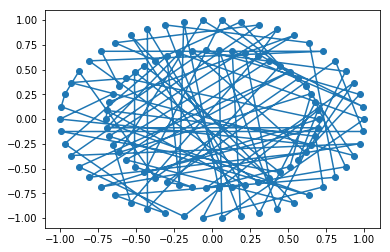

tensor(103.6046)
tensor(102.5186)
tensor(100.1716)
tensor(100.1831)
tensor(90.0212)
tensor(89.1403)
tensor(88.4088)
tensor(82.2544)
tensor(81.9633)
tensor(77.5875)


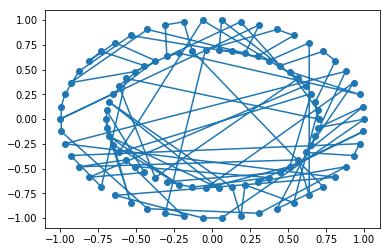

tensor(73.9232)
tensor(73.5535)
tensor(72.8535)
tensor(71.1040)
tensor(69.4959)
tensor(68.3505)
tensor(68.3505)
tensor(64.4872)
tensor(62.2995)
tensor(61.8806)


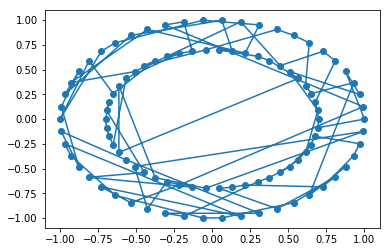

tensor(60.8176)
tensor(60.8176)
tensor(60.0990)
tensor(60.3404)
tensor(59.1560)
tensor(59.1560)
tensor(59.4623)
tensor(59.4623)
tensor(58.9968)
tensor(57.3628)


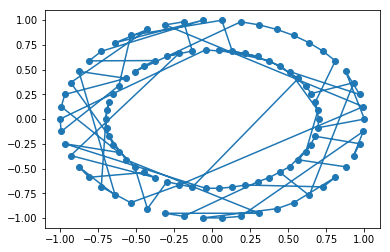

tensor(56.5770)
tensor(56.0168)
tensor(55.4823)
tensor(55.4823)
tensor(54.8886)
tensor(54.8886)
tensor(54.4531)
tensor(54.4531)
tensor(53.5193)
tensor(54.0490)


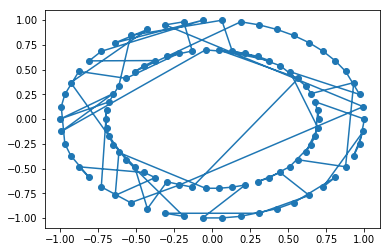

tensor(53.4342)
tensor(53.4005)
tensor(53.4005)
tensor(53.4005)
tensor(52.9854)
tensor(51.9309)
tensor(51.9309)
tensor(51.9309)
tensor(51.1837)
tensor(51.1837)


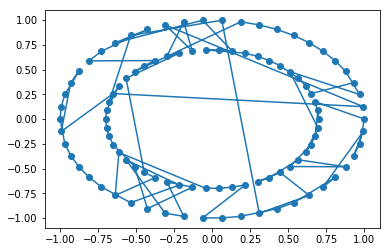

tensor(51.1428)
tensor(51.1273)
tensor(51.1273)
tensor(50.4145)
tensor(50.0827)
tensor(50.0331)
tensor(50.0331)
tensor(50.0257)
tensor(49.6425)
tensor(49.6538)


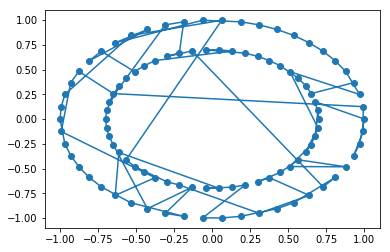

tensor(49.3616)
tensor(49.3616)
tensor(49.8253)
tensor(49.8253)
tensor(49.8253)
tensor(49.8253)
tensor(49.7240)
tensor(48.3801)
tensor(48.4102)
tensor(48.4102)


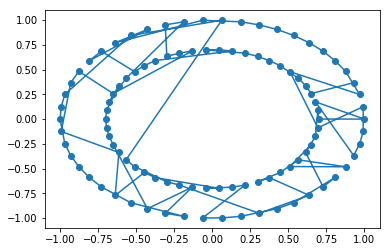

tensor(48.4102)
tensor(48.4102)
tensor(48.4102)
tensor(48.0667)
tensor(47.7496)
tensor(47.7496)
tensor(48.1030)
tensor(48.1030)
tensor(47.7112)
tensor(47.6818)


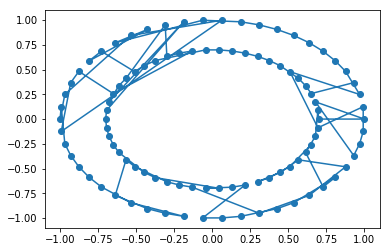

tensor(47.6818)
tensor(47.5320)
tensor(47.5320)
tensor(47.4307)
tensor(47.4307)
tensor(47.1261)
tensor(47.1261)
tensor(46.3387)
tensor(46.3387)
tensor(46.3387)


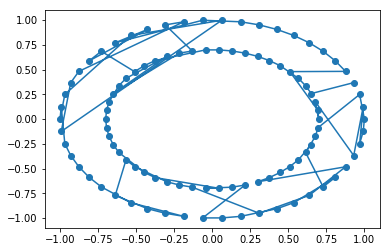

tensor(45.5094)
tensor(45.5094)
tensor(45.5094)
tensor(45.4741)
tensor(45.4741)
tensor(45.4741)
tensor(45.2584)
tensor(45.2584)
tensor(45.1309)
tensor(45.1309)


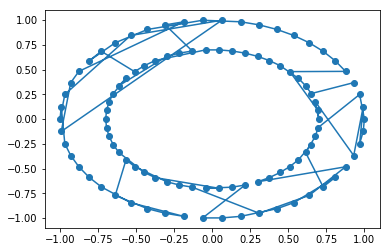

tensor(45.1309)
tensor(44.5680)
tensor(44.5680)
tensor(44.3572)
tensor(44.3572)
tensor(44.7910)
tensor(44.7910)
tensor(44.7910)
tensor(44.1578)
tensor(44.1578)


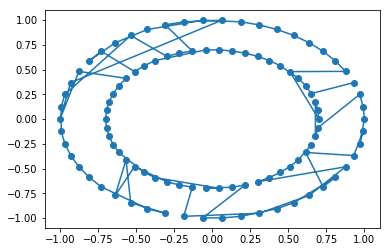

tensor(44.1578)
tensor(43.8588)
tensor(43.8588)
tensor(43.8588)
tensor(43.8588)
tensor(43.1852)
tensor(43.1852)
tensor(43.1852)
tensor(43.1852)
tensor(43.1852)


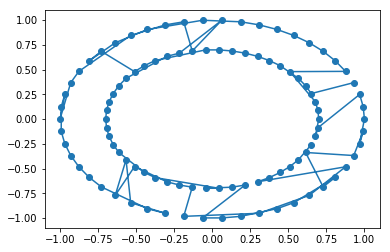

tensor(43.1852)
tensor(43.1312)
tensor(43.1312)
tensor(43.1312)
tensor(43.1312)
tensor(43.1312)
tensor(43.1312)
tensor(43.1312)
tensor(43.1312)
tensor(42.5808)


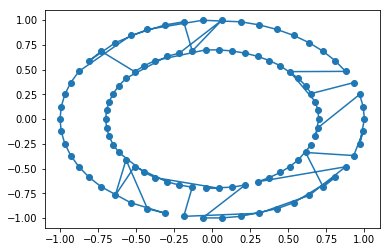

tensor(42.5808)
tensor(42.0998)
tensor(42.0998)
tensor(42.0998)
tensor(41.8072)
tensor(41.7118)
tensor(41.7118)
tensor(41.7118)
tensor(41.7118)
tensor(41.7118)


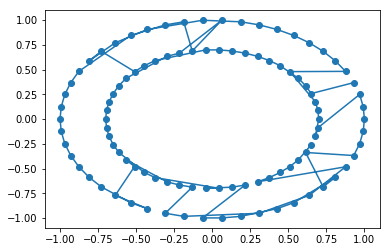

tensor(41.5590)
tensor(41.5590)
tensor(41.5590)
tensor(41.5590)
tensor(41.5590)
tensor(41.5590)
tensor(41.5590)
tensor(41.5590)
tensor(41.5590)
tensor(41.5590)


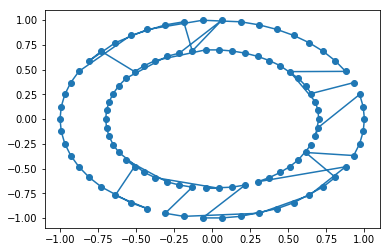

tensor(41.4539)
tensor(41.4539)
tensor(41.4539)
tensor(41.4539)
tensor(41.4539)
tensor(41.4539)
tensor(41.4539)
tensor(41.4298)
tensor(41.4298)
tensor(41.4298)


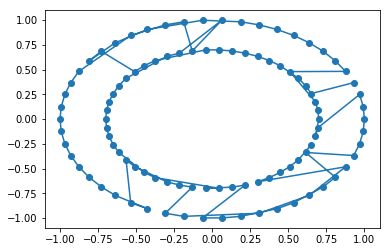

tensor(41.4298)
tensor(41.4298)
tensor(41.3410)
tensor(41.3410)
tensor(41.3410)
tensor(41.3410)
tensor(41.3410)
tensor(41.3410)
tensor(41.3410)
tensor(41.3410)


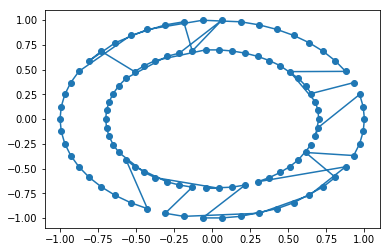

tensor(41.3410)
tensor(41.3410)
tensor(41.3410)
tensor(41.3410)
tensor(41.3410)
tensor(41.3410)
tensor(41.3410)
tensor(41.2761)
tensor(41.2761)
tensor(41.2761)


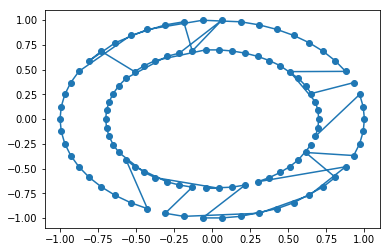

tensor(41.2761)
tensor(41.2761)
tensor(41.2761)
tensor(41.2761)
tensor(41.2761)
tensor(41.2761)
tensor(41.2761)
tensor(41.2761)
tensor(41.2761)
tensor(41.2761)


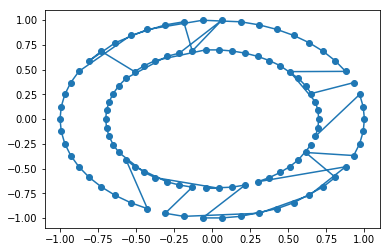

tensor(41.2761)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)


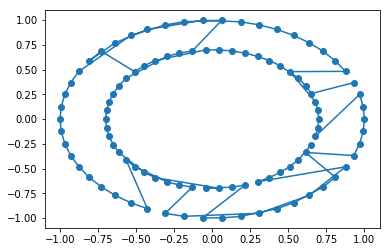

tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)


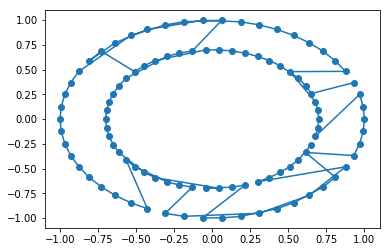

tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)


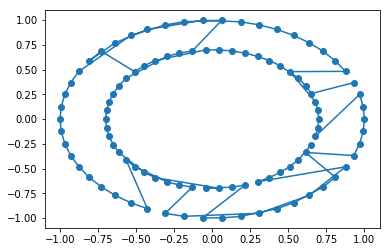

tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.8668)


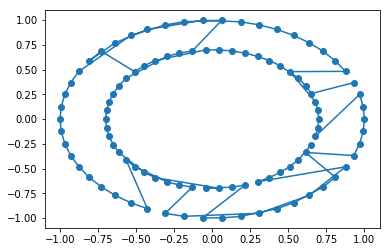

tensor(40.8668)
tensor(40.8668)
tensor(40.8668)
tensor(40.6767)
tensor(40.6767)
tensor(40.6767)
tensor(40.6767)
tensor(40.6767)
tensor(40.6767)
tensor(40.6767)


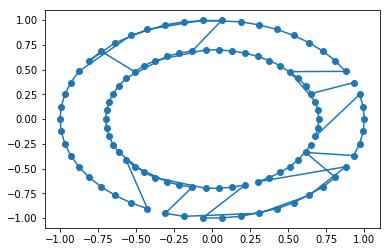

tensor(40.6767)
tensor(40.6767)
tensor(40.6767)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


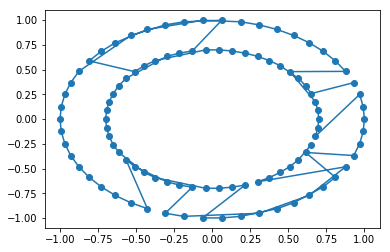

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


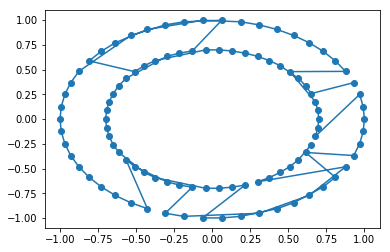

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


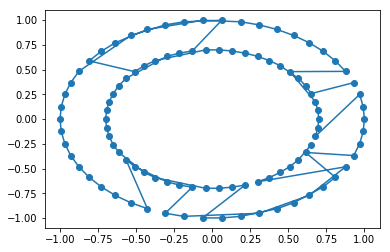

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


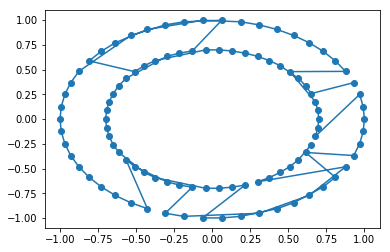

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


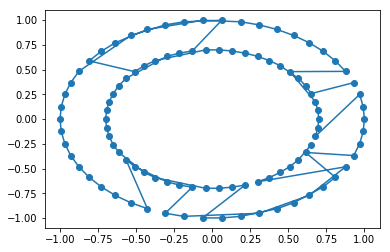

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


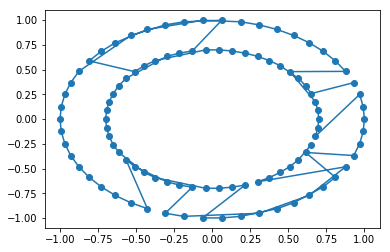

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


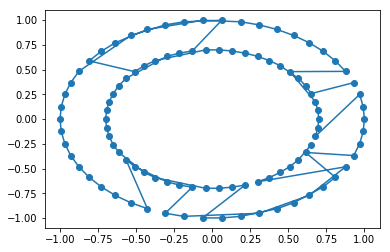

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


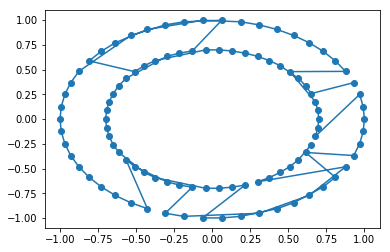

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


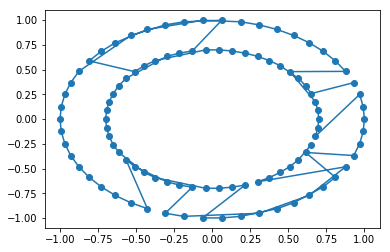

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


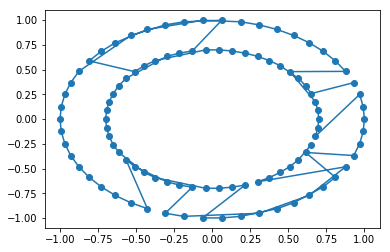

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


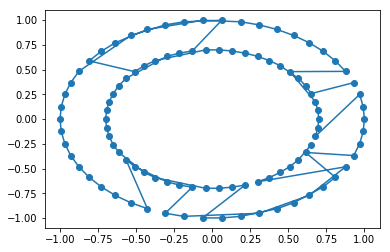

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


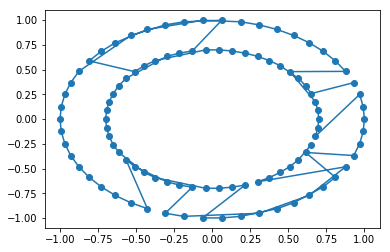

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


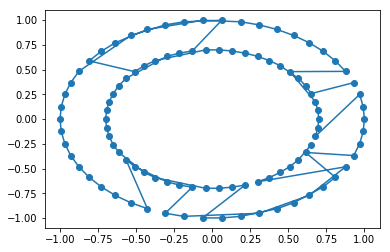

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


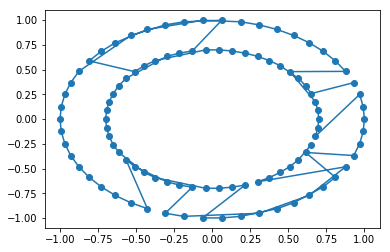

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


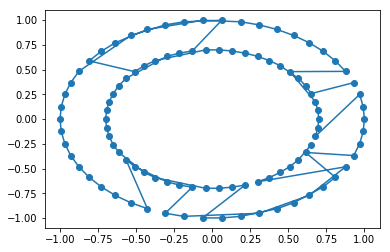

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


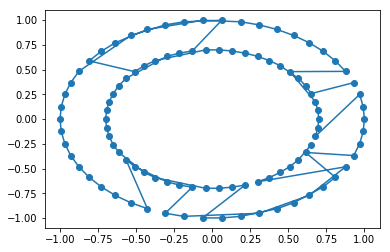

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


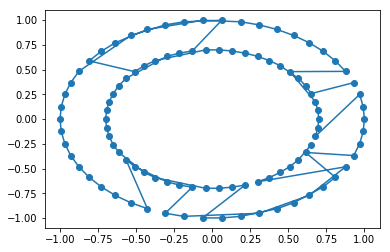

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


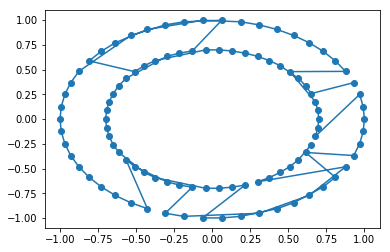

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


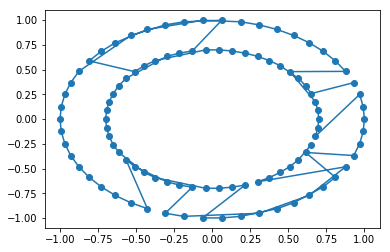

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


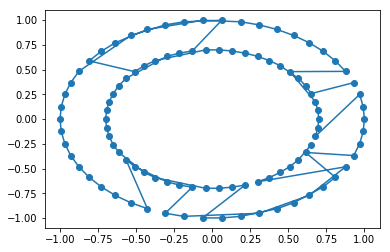

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


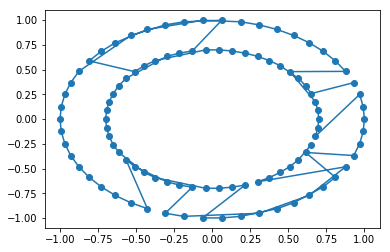

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


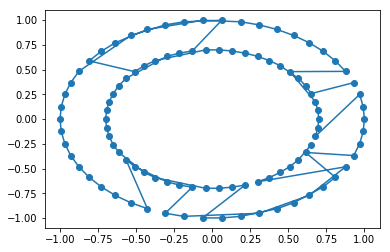

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


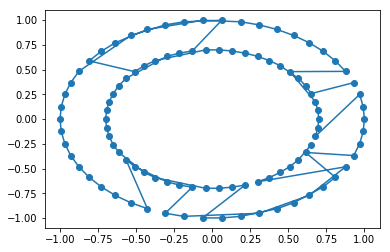

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


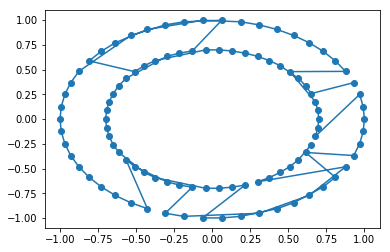

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


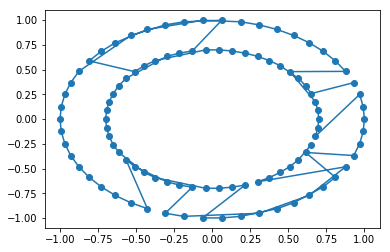

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


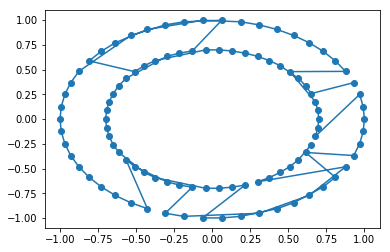

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


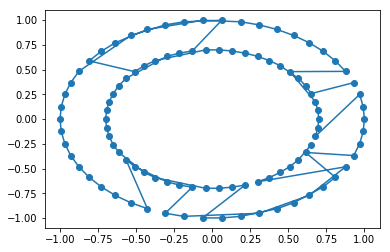

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


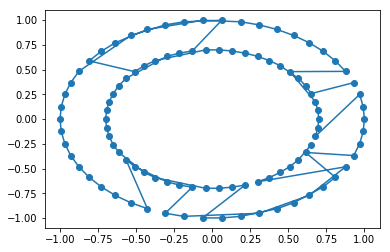

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


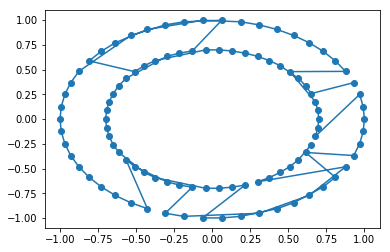

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


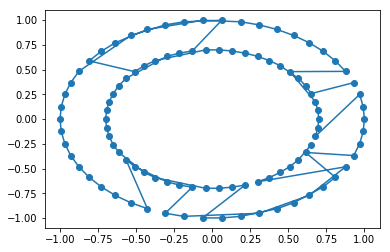

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


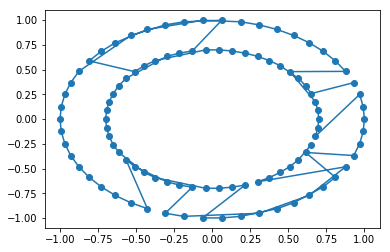

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


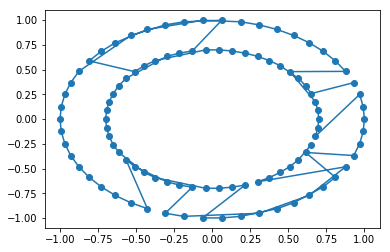

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


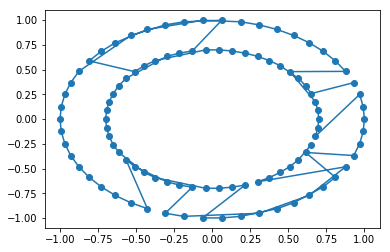

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


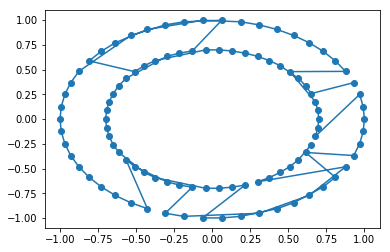

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


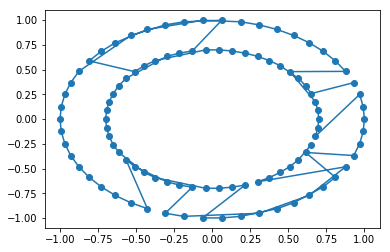

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


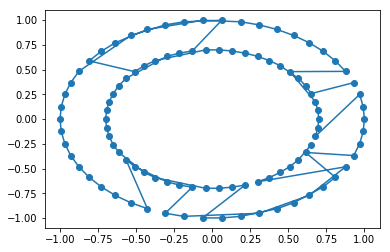

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


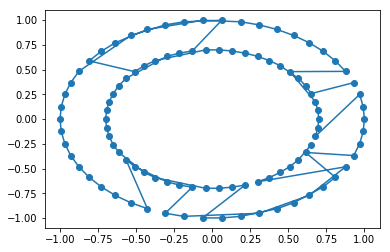

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


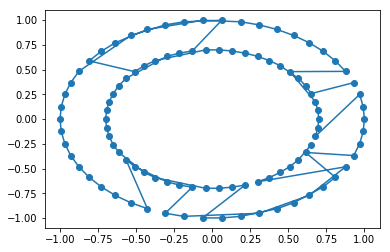

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


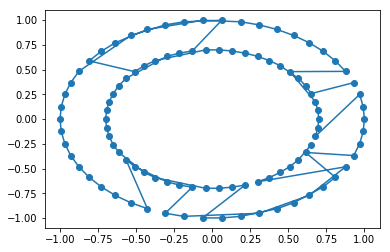

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


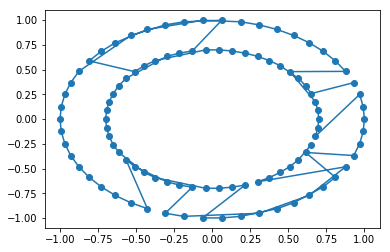

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


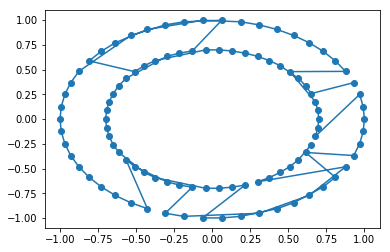

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


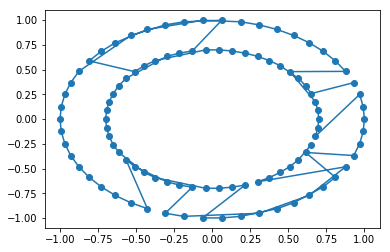

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


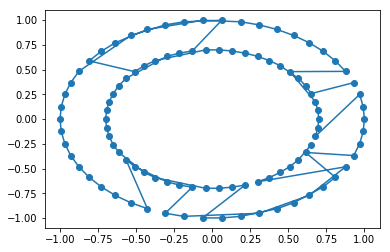

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


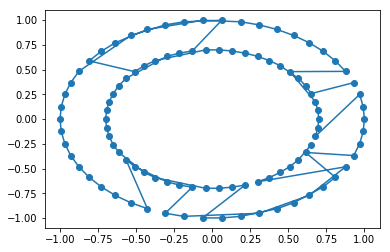

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


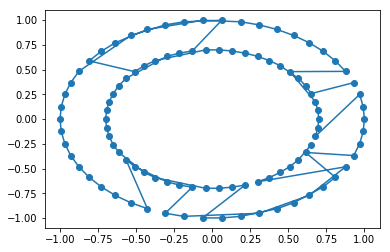

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


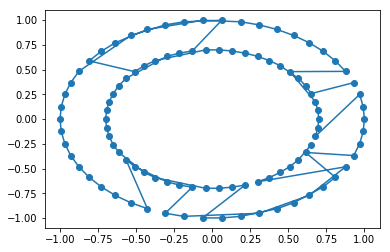

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


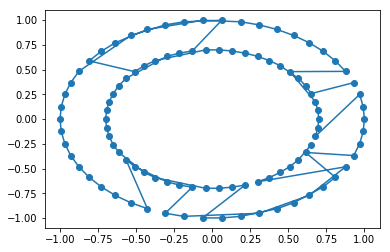

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


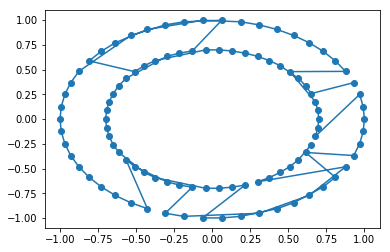

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


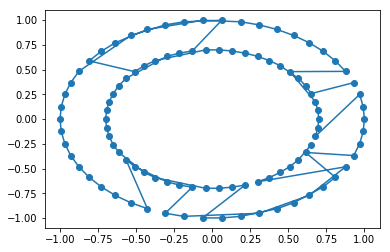

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


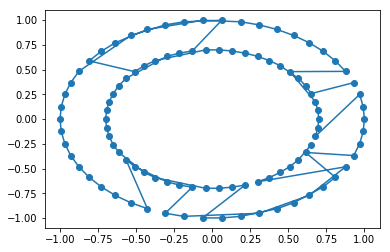

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


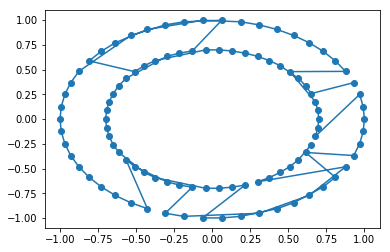

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


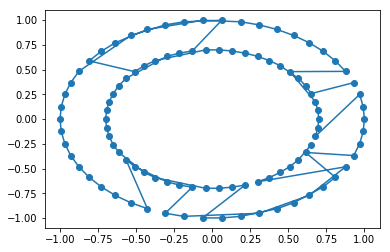

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


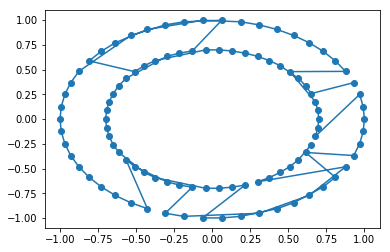

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


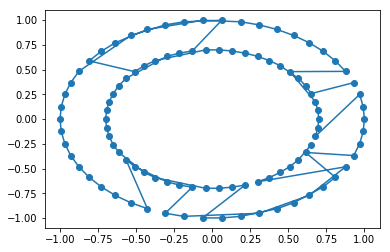

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


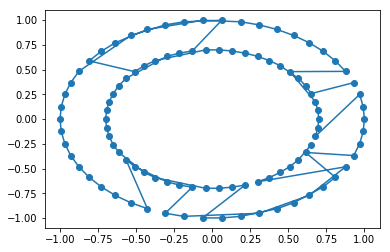

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


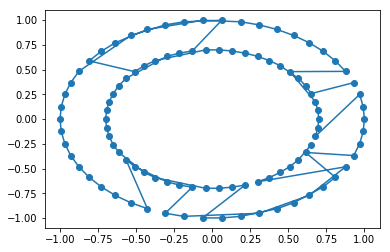

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


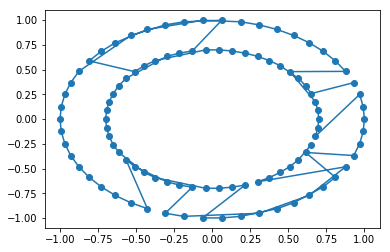

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


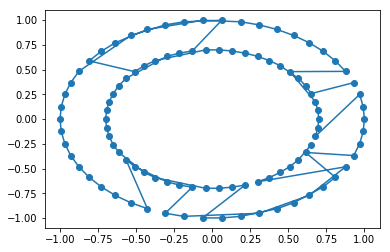

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


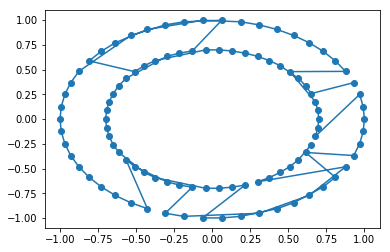

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


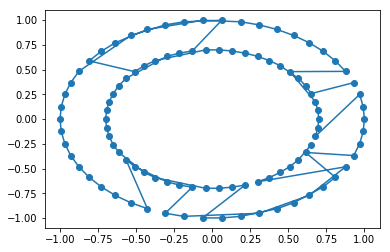

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


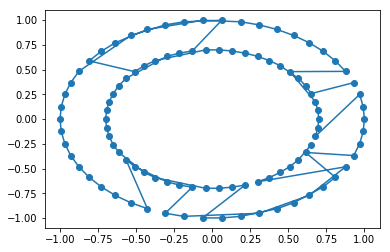

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


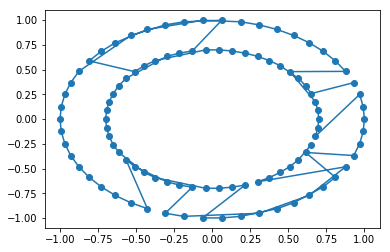

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


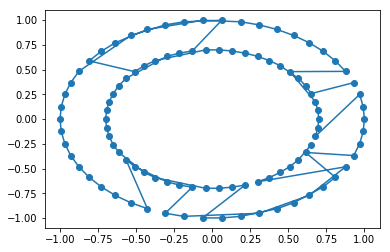

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


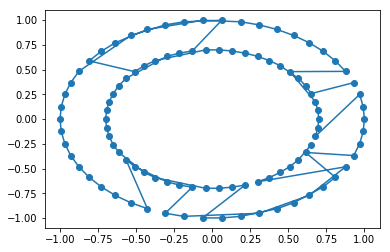

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


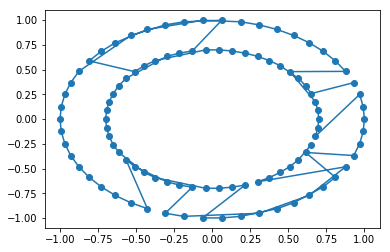

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


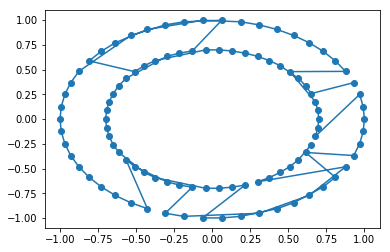

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


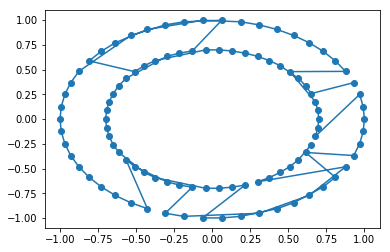

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


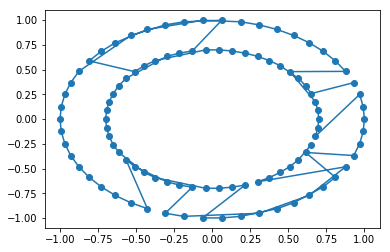

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


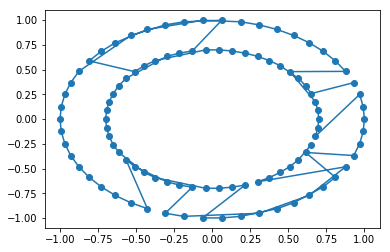

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


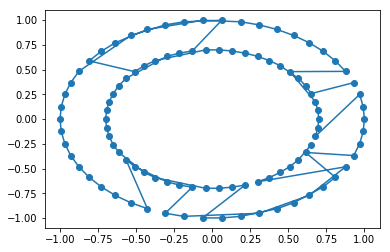

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


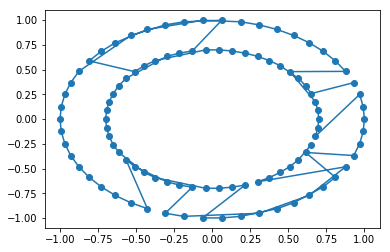

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


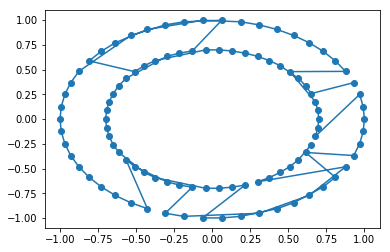

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


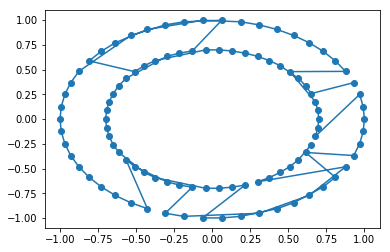

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


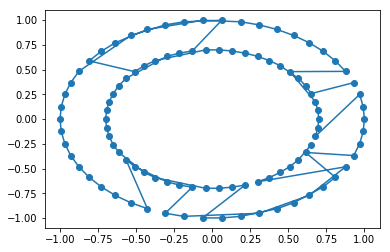

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


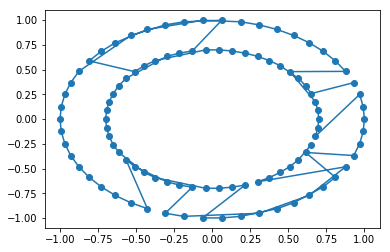

tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)
tensor(40.5465)


In [144]:
test = LCOTSP(city_num=100)
for t in range(10**3):
    test.update()
    if t%10==1:
        plt.plot(test.locations[test.units, 0].numpy(), test.locations[test.units, 1].numpy(), linestyle='-', marker='o')
        plt.show()